<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-07 10:00:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  41.2MB/s    in 3.7s    

2025-01-07 10:00:50 (41.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [24]:
!pip install seaborn 
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.8 MB/s eta 0:00:00


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [5]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [6]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [7]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [8]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


In [10]:
# Display the result
print(f"Number of rows in the table: {df.iloc[0, 0]}")

Number of rows in the table: 65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [11]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [12]:
# Display the result
print(pd.read_sql_query(QUERY, conn))

  Table_Name
0       main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [15]:
# Display the result
print(pd.read_sql_query(QUERY, conn))

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [16]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [20]:
# Load the entire table into a DataFrame
df_new = pd.read_sql_query("SELECT * FROM main", conn)

# Verify the columns again
print(df_new.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


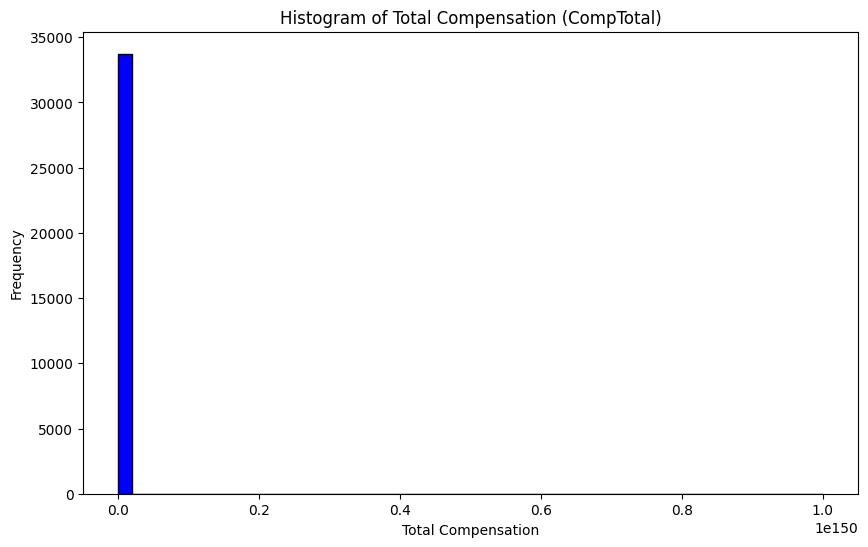

In [21]:
## Write your code here

# Plot a histogram of CompTotal (Total Compensation)
plt.figure(figsize=(10, 6))
plt.hist(df_new['CompTotal'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


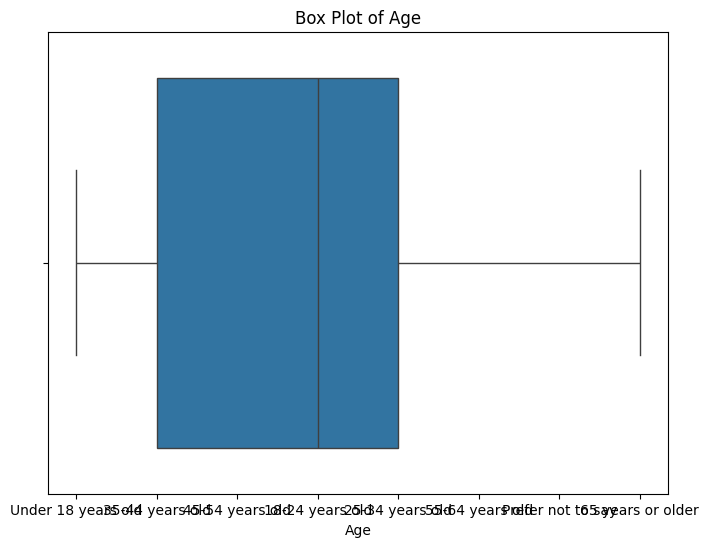

In [26]:
## Write your code here

# Plot a box plot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_new, x='Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


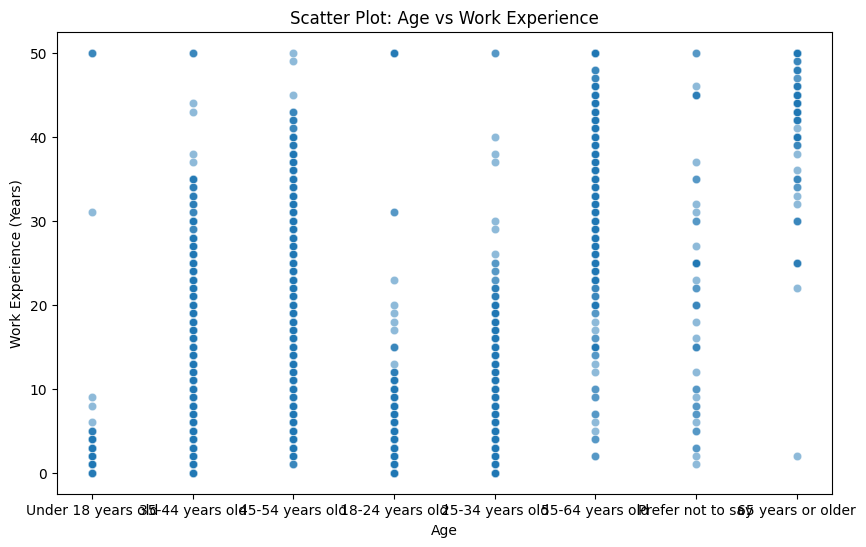

In [27]:
## Write your code here

# Create a scatter plot of Age and WorkExp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='Age', y='WorkExp', alpha=0.5)
plt.title('Scatter Plot: Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


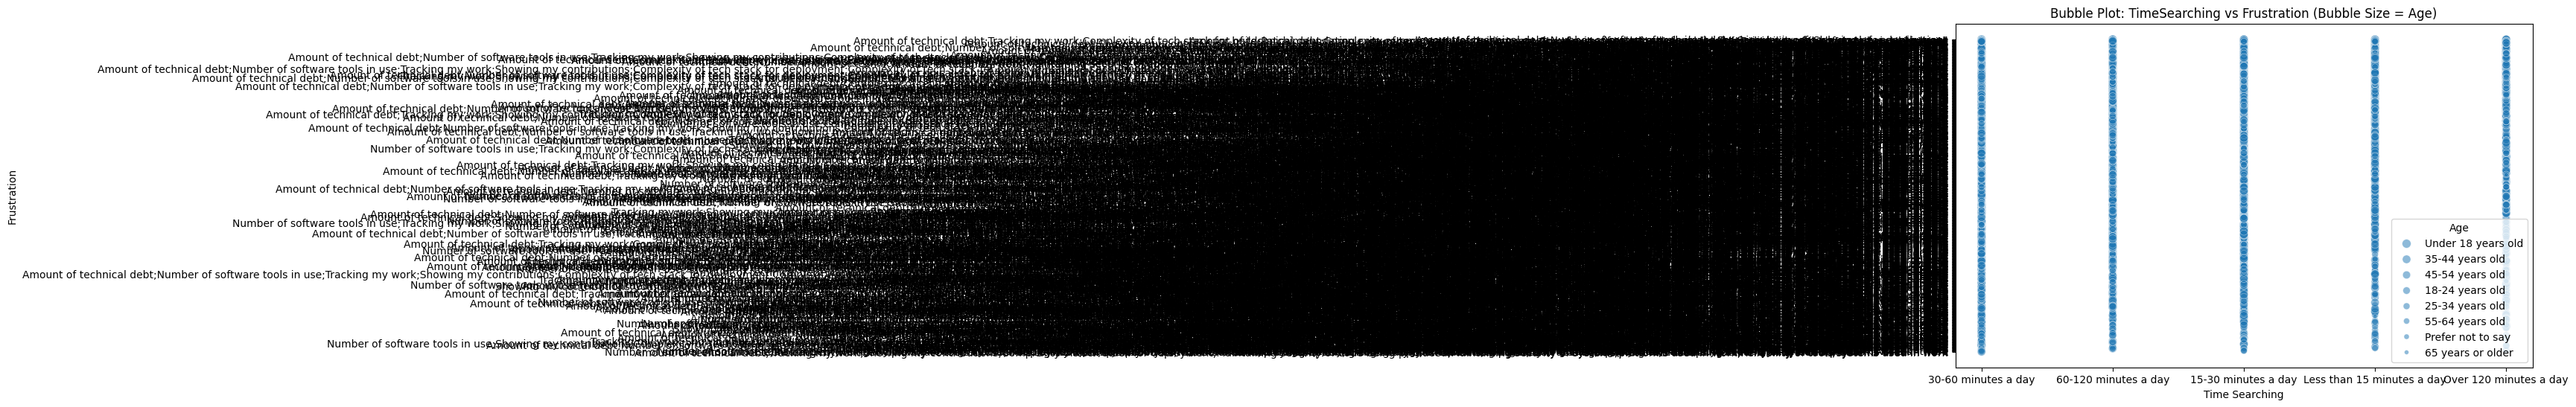

In [28]:
## Write your code here

# Create a bubble plot of TimeSearching and Frustration using Age as the bubble size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='TimeSearching', y='Frustration', size='Age', alpha=0.5)
plt.title('Bubble Plot: TimeSearching vs Frustration (Bubble Size = Age)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


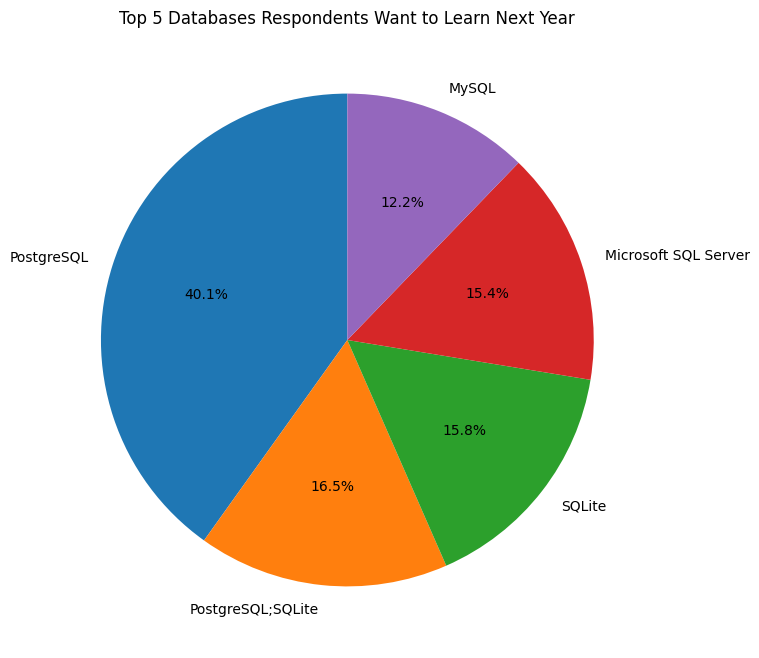

In [29]:
## Write your code here

# Create a pie chart of the top 5 databases respondents wish to learn next year
top_databases = df_new['DatabaseWantToWorkWith'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [44]:
## Write your code here

In [45]:
# Calculate value counts for key columns
print(df_new['TimeSearching'].isnull().sum())
print('---------------------------------------')
print(df_new['TimeSearching'].value_counts().sort_values(ascending=False))

36252
---------------------------------------
TimeSearching
30-60 minutes a day           10939
15-30 minutes a day            7794
60-120 minutes a day           5266
Less than 15 minutes a day     2681
Over 120 minutes a day         2183
Name: count, dtype: int64


In [46]:
# Calculate value counts for key columns
print(df_new['TimeAnswering'].isnull().sum())
print('---------------------------------------')
print(df_new['TimeAnswering'].value_counts().sort_values(ascending=False))

36319
---------------------------------------
TimeAnswering
15-30 minutes a day           9328
30-60 minutes a day           8629
Less than 15 minutes a day    5906
60-120 minutes a day          3699
Over 120 minutes a day        1234
Name: count, dtype: int64


In [48]:
# Define a mapping for time strings to numeric values (in minutes)
time_mapping = {
    'Less than 15 minutes a day': 10,  # Approximate midpoint
    '15-30 minutes a day': 22.5,       # Approximate midpoint
    '30-60 minutes a day': 45,         # Approximate midpoint
    '60-120 minutes a day': 90,        # Approximate midpoint
    'Over 120 minutes a day': 150      # Approximate value
}

# Apply the mapping to the 'TimeSearching' and 'TimeAnswering' columns
df_new['TimeSearching'] = df_new['TimeSearching'].map(time_mapping)
df_new['TimeAnswering'] = df_new['TimeAnswering'].map(time_mapping)

/tmp/ipykernel_81/353526627.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TimeSearching'] = df_new['TimeSearching'].map(time_mapping)
/tmp/ipykernel_81/353526627.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TimeAnswering'] = df_new['TimeAnswering'].map(time_mapping)


In [49]:
# Drop rows with missing values in 'TimeSearching' or 'TimeAnswering'
df_new = df_new.dropna(subset=['TimeSearching', 'TimeAnswering'])

In [47]:
# Calculate value counts for key columns
print(df_new['Age'].isnull().sum())
print('---------------------------------------')
print(df_new['Age'].value_counts().sort_values(ascending=False))

0
---------------------------------------
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Name: count, dtype: int64


In [50]:
# Define a mapping for age ranges to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply the mapping to the 'Age' column
df_new['Age_Numeric'] = df_new['Age'].map(age_mapping)

# Drop rows with missing values in 'Age_Numeric'
df_new = df_new.dropna(subset=['Age_Numeric'])

/tmp/ipykernel_81/2005352231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Age_Numeric'] = df_new['Age'].map(age_mapping)


<Figure size 1000x600 with 0 Axes>

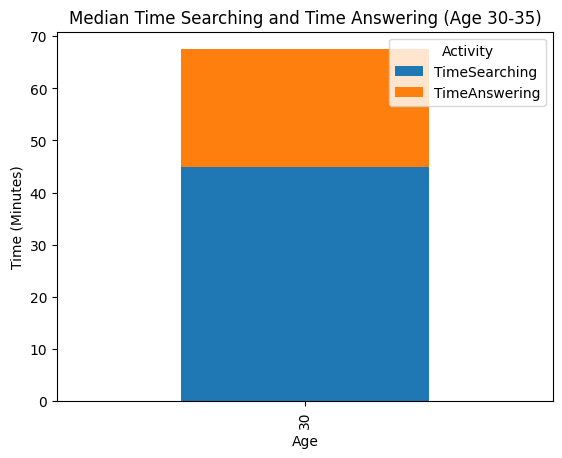

In [51]:
# Filter the data for the age group 30 to 35
age_group = df_new[(df_new['Age_Numeric'] >= 30) & (df_new['Age_Numeric'] <= 35)]

# Calculate the median TimeSearching and TimeAnswering for each age
median_times = age_group.groupby('Age_Numeric')[['TimeSearching', 'TimeAnswering']].median()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
median_times.plot(kind='bar', stacked=True)
plt.title('Median Time Searching and Time Answering (Age 30-35)')
plt.xlabel('Age')
plt.ylabel('Time (Minutes)')
plt.legend(title='Activity')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [52]:
## Write your code here

# Calculate value counts for key columns
print(df_new['CompTotal'].isnull().sum())
print('---------------------------------------')
print(df_new['CompTotal'].value_counts().sort_values(ascending=False))

6590
---------------------------------------
CompTotal
100000.0    561
60000.0     501
120000.0    498
50000.0     446
80000.0     439
           ... 
33700.0       1
639124.0      1
85700.0       1
78468.0       1
99900.0       1
Name: count, Length: 2676, dtype: int64


In [53]:
# Filter the data for the age group 45 to 60
age_group = df_new[(df_new['Age_Numeric'] >= 45) & (df_new['Age_Numeric'] <= 60)]

# Calculate the median CompTotal for each age
median_comp = age_group.groupby('Age_Numeric')['CompTotal'].median()

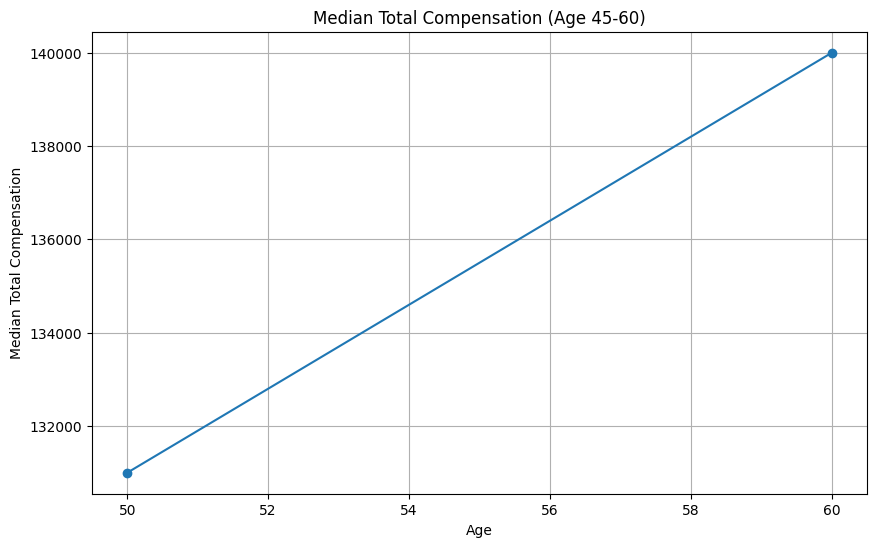

In [54]:
# Plot the line chart
plt.figure(figsize=(10, 6))
median_comp.plot(kind='line', marker='o')
plt.title('Median Total Compensation (Age 45-60)')
plt.xlabel('Age')
plt.ylabel('Median Total Compensation')
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


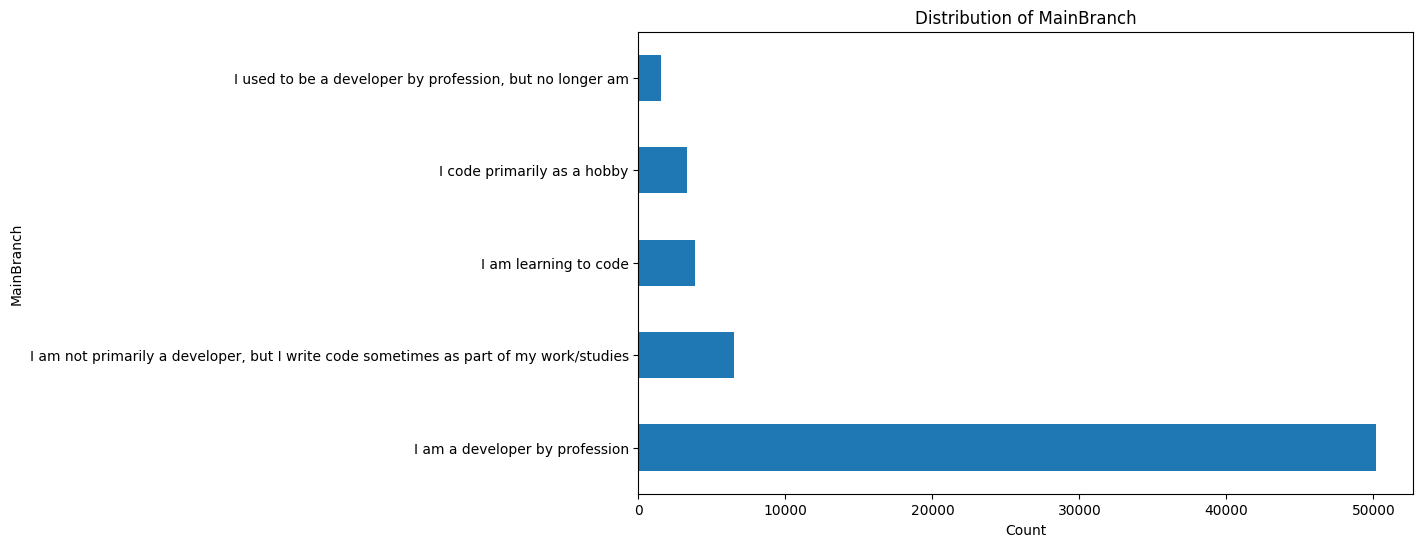

In [32]:
## Write your code here

# Create a horizontal bar chart using the MainBranch column
main_branch_counts = df_new['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh')
plt.title('Distribution of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
